# Chargement des libraries

In [1]:
library(tidyr)
library(openxlsx)
library(readxl)
library(tibble)
library(ggplot2)
library(purrr)
library(dplyr)
library(pracma)

# Manipulation des dates
library(lubridate)

# analyse et prédiction des séries temporelles univariées
library(forecast)

# Séries temporelles et calculs financiers
library(tseries)


Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'pracma'

The following object is masked from 'package:purrr':

    cross

Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method           

In [2]:
# Lecture du dataframe de RTE sur la consommation énergétique
elec <- read.csv("C:/Users/Thibaut/Google Drive/Data Analyse/OpenClassRoom - Projets/Projet 9/data/eCO2mix_RTE_energie_M.csv", header=TRUE, sep=";")

In [3]:
# Lecture des données météo
meteo <- read_excel("C:/Users/Thibaut/Google Drive/Data Analyse/OpenClassRoom - Projets/Projet 9/data/calcul_DJU_15_12_2021.xlsx")

## Nettoyage du dataframe des degrés de jour unifiés (DJU)

In [4]:
head(meteo)

Year,JAN,FÉV,MAR,AVR,MAI,JUN,JUI,AOÛ,SEP,OCT,NOV,DÉC,Total
2021,396.7,302.8,271.0,228.3,138.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1336.9
2020,339.0,249.6,268.6,81.4,65.7,20.6,0.9,4.5,34.3,157.5,227.2,336.8,1785.9
2019,404.9,268.3,233.1,168.5,117.9,24.4,0.0,1.7,26.7,133.7,282.6,327.3,1989.0
2018,303.4,432.6,314.3,119.7,55.9,8.1,0.0,3.3,34.3,122.4,282.5,325.9,2002.2
2017,467.9,278.4,206.1,182.6,75.0,9.4,1.0,6.8,62.6,99.4,282.6,369.0,2040.6
2016,364.4,321.6,321.1,212.1,88.1,27.5,5.7,3.2,11.7,176.0,285.6,390.8,2207.3


In [5]:
# Suppression de la colonne "Total"
meteo$Total <- NULL

In [6]:
colnames(meteo) <- c("Year", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12")
meteo

Year,01,02,03,04,05,06,07,08,09,10,11,12
2021,396.7,302.8,271.0,228.3,138.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,339.0,249.6,268.6,81.4,65.7,20.6,0.9,4.5,34.3,157.5,227.2,336.8
2019,404.9,268.3,233.1,168.5,117.9,24.4,0.0,1.7,26.7,133.7,282.6,327.3
2018,303.4,432.6,314.3,119.7,55.9,8.1,0.0,3.3,34.3,122.4,282.5,325.9
2017,467.9,278.4,206.1,182.6,75.0,9.4,1.0,6.8,62.6,99.4,282.6,369.0
2016,364.4,321.6,321.1,212.1,88.1,27.5,5.7,3.2,11.7,176.0,285.6,390.8
2015,392.0,365.7,275.5,141.1,91.5,15.8,6.9,6.1,71.9,176.9,195.0,248.1
2014,324.4,281.9,223.9,135.5,100.2,19.1,8.3,19.3,16.0,92.3,222.6,368.2
2013,429.2,402.2,376.6,209.5,158.4,43.6,0.6,5.0,41.5,105.0,303.9,349.5
2012,336.0,435.9,201.9,230.3,83.3,35.0,12.4,2.4,58.0,154.6,296.2,345.9


In [7]:
# Regroupement des colonnes 2 à 13 en une seule colonne et création d'une seconde colonne qui donne le mois correspondant
meteo <- cbind(meteo[1],stack(meteo[2:13]))
head(meteo)

Year,values,ind
2021,396.7,01
2020,339.0,01
2019,404.9,01
2018,303.4,01
2017,467.9,01
2016,364.4,01


In [8]:
# Création d'une colonne "date" rassemblant l'année et le mois
meteo$Mois <- paste(meteo$Year, meteo$ind, sep = "-")

In [9]:
# Suppression des colonnes "Year" et "ind"
meteo$Year <- NULL
meteo$ind <- NULL

In [10]:
head(meteo)

values,Mois
396.7,2021-01
339.0,2020-01
404.9,2019-01
303.4,2018-01
467.9,2017-01
364.4,2016-01


## Nettoyage du dataframe de la consommation électrique

In [11]:
head(elec)

Mois,Qualité,Territoire,Production.totale,Production.nucléaire,Production.thermique.totale,Production.thermique.charbon,Production.thermique.fioul,Production.thermique.gaz,Production.hydraulique,...,Production.bioénergies,Consommation.totale,Solde.exportateur,Echanges.export,Echanges.import,Echanges.avec.le.Royaume.Uni,Echanges.avec.l.Espagne,Echanges.avec.l.Italie,Echanges.avec.la.Suisse,Echanges.avec.l.Allemagne.et.la.Belgique
2012-01,Données définitives,France,57177,42811,5399,741,691,3967,6741,...,514,51086,5371,7043,1672,929,724,1581,2195,-59
2012-02,Données définitives,France,54419,38661,8721,2511,1309,4901,5244,...,454,54476,-715,4504,5220,-798,-309,1244,1579,-2430
2012-03,Données définitives,France,48583,37549,5276,1435,666,3175,3894,...,531,43156,4888,7042,2153,583,330,1742,2235,-1
2012-04,Données définitives,France,44192,33100,3484,1655,486,1343,5302,...,405,40176,3447,5762,2314,547,-9,1271,1670,-31
2012-05,Données définitives,France,40433,29058,1772,854,368,549,7706,...,469,35257,4425,6391,1965,693,251,1341,1060,1079
2012-06,Données définitives,France,37518,26562,2219,960,384,875,6823,...,437,33219,3648,5674,2026,447,482,1207,599,913


In [12]:
# Restriction au données qui concerne le territoire Français
elec <- elec[elec$Territoire == "France",]

In [13]:
# Restriction aux colonnes  "Mois" et "Consommation.totale"
elec <- elec %>%
  select(Mois, Consommation.totale)
head(elec)

Mois,Consommation.totale
2012-01,51086
2012-02,54476
2012-03,43156
2012-04,40176
2012-05,35257
2012-06,33219


###  Fusion des dataframes

In [14]:
# Association des deux dataframes par la colonne "Mois
data <- merge(elec, meteo, by = "Mois")
head(data)

Mois,Consommation.totale,values
2012-01,51086,336.0
2012-02,54476,435.9
2012-03,43156,201.9
2012-04,40176,230.3
2012-05,35257,83.3
2012-06,33219,35.0


In [15]:
# Ajout de "-01" pour adapter la colonne "Mois" au format Date
data$Mois <- paste(data$Mois, '-01', sep="")

# Conversion de la colonne "Mois" au format Date
data$Mois <- as.Date(data$Mois, format="%Y-%m-%d")
head(data)

Mois,Consommation.totale,values
2012-01-01,51086,336.0
2012-02-01,54476,435.9
2012-03-01,43156,201.9
2012-04-01,40176,230.3
2012-05-01,35257,83.3
2012-06-01,33219,35.0


In [16]:
# Identification des valeurs manquantes
data[!complete.cases(data),]

Mois,Consommation.totale,values


In [17]:
# Changement de nom des colonnes
data <- rename(data, "conso_elec" = "Consommation.totale")
data <- rename(data, "DJU" =  "values")

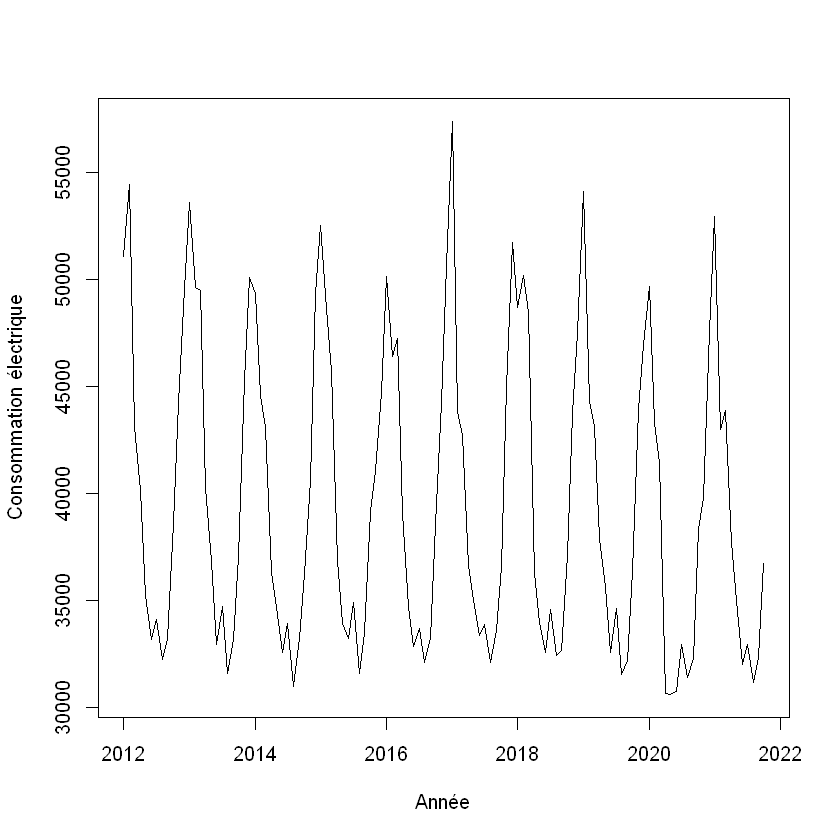

In [18]:
# Représentation graphique
plot(data$Mois, data$conso_elec,type="l", xlab="Année", ylab="Consommation électrique")

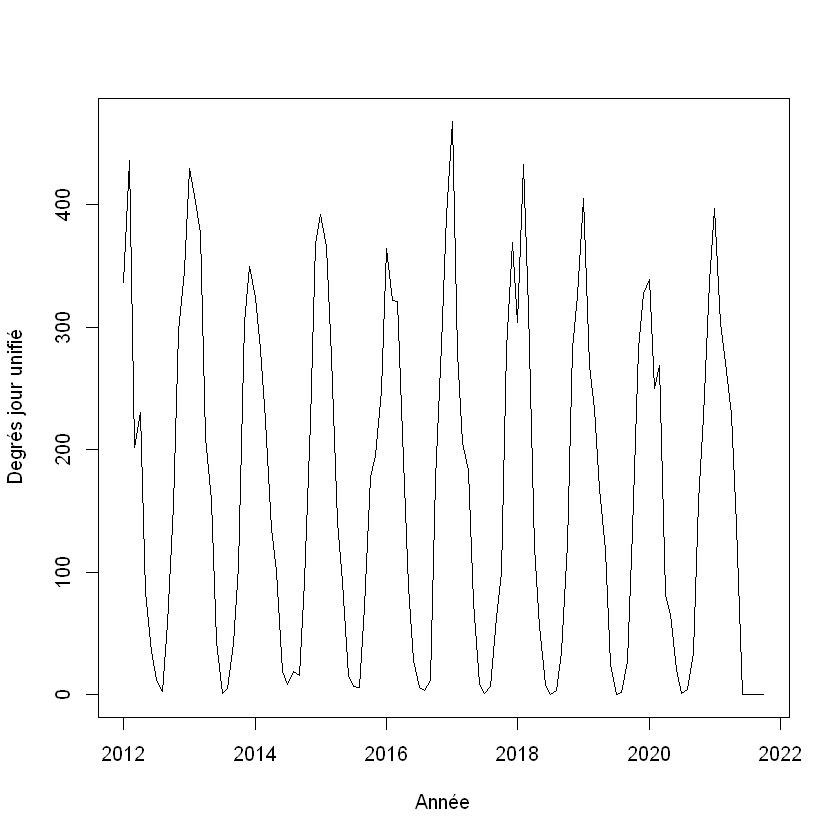

In [19]:
plot(data$Mois, data$DJU, type="l", xlab="Année", ylab="Degrés jour unifié")

On observe sur chacun des graphiques une saisonnalité de période 12. Le graphique dédié aux degrés jour unifié présente des pics mensuels situés entre 350 et 450 en périodes d'hiver et des creux proches de 0 en périodes estivales. Cela signifie que l'écart négatif journalier avec la température de référence de 18°C atteint une somme mensuelle qui varie entre 0°C (lorsque chaque jour d'un mois est supérieur à 19°C) et 450°C.

La courbe de consommation électrique montre des oscillations entre des pics qu'on situe autour de 50-60 000 terawatt-heure (TWh) par mois et des creux autour de 30-35 000 TWh mensuel pendant les périodes estivales. La saisonnalité justifie donc en France une augmentation de la consommation électrique de presque 100% entre l'été et l'hiver. Cela s'explique notamment par une diminution des températures et donc une plus grande consommation de chauffage, mais aussi par un raccourcissement des périodes d'ensoleillement et donc une plus forte utilisation des dispositifs d'éclairage.

D'une année à l'autre, on observe des variations assez similaires de part et d'autre des graphiques. L'hiver 2017 présente ainsi le pic à la fois le plus étroit et le plus haut, tant en degrés de jour unifié qu'en consommation électrique. Janvier 2017 a en effet présenté une température moyenne de 2°C en dessous des normales saisonnières, tandis que février 2017 a au contraire été particulièrement doux avec une moyenne de +2°C par rapport aux températures habituelles.

L'hiver 2018 présente également la spécificité d'un double pic, suggérant des variations de température importantes. L'historique des conditions météorologiques en France confirme en effet que le mois de janvier 2018 a été particulièrement doux, présentant un excédent de 3,3°C par rapport aux normales saisonnières.

Quelques différences mineures, cependant, peuvent être constatées entre les deux graphiques. Les creux de consommation électrique sont en effet moins homogènes que les creux des températures. On constate en effet un petit regain de consommation d'énergie lorsque les températures sont uniformément supérieures à 18°C. Cette brève élévation de la consommation pourrait par exemple s'expliquer par une utilisation des dispositifs d'air conditionné pour compenser les fortes hausses de chaleur.

La série temporelle est de type additif car l'amplitude des variations est relativement constante d'une année à l'autre. A cette échelle, nous n'observons ni croissance ni décroissance de la tendance. Dans le cas où l'amplitude des variations varierait significativement, nous parlerions alors de modèle multiplicatif. Il ne sera donc pas nécessaire de convertir nos données au format logarithmique.

### Relation entre la consommation électrique (x) et les degrés de jour unifié relevés (y)

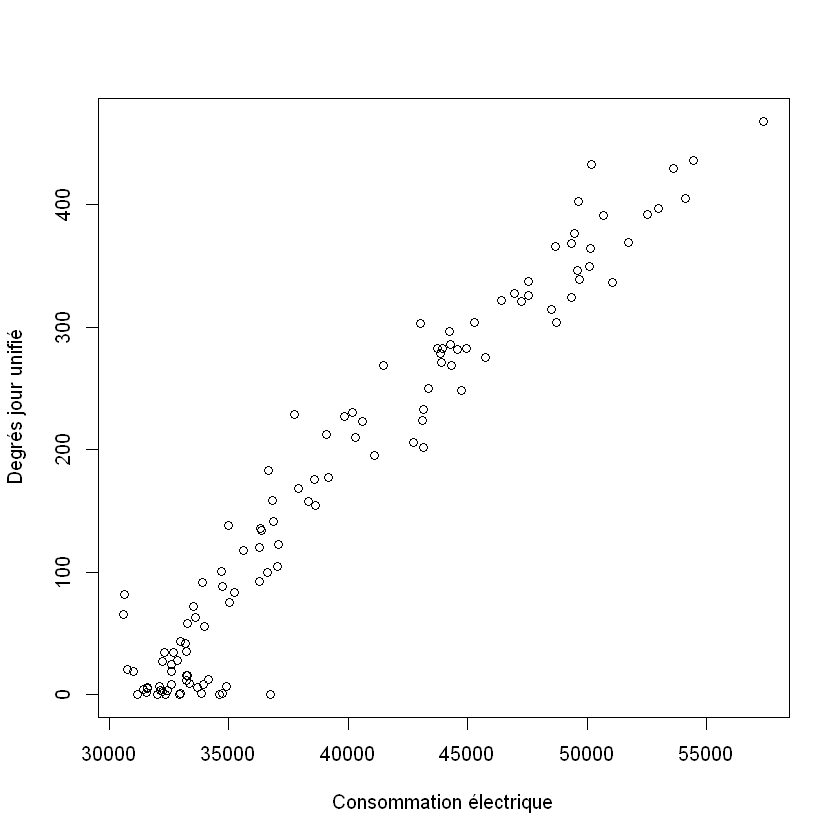

In [20]:
# Relation entre consommation électrique et degrés de jour unifié
plot(x = data$conso_elec, y = data$DJU, xlab = "Consommation électrique", ylab = "Degrés jour unifié")

On observe une corrélation relativement linéaire entre la consommation électrique et les degrés jour unifié (DJU) relevés. 
Quelques outliers peuvent s'observer notamment à 0 en ordonnée. Cette surconsommation électrique est probablement liée aux fortes chaleurs qui ne sont pas prises en compte dans la mesure des DJU et entraînent souvent une utilisation des appareils de refroidissement.

In [21]:
# Régression linéaire de la consommation sur les degrés de jour unifié
reg=lm(data$conso_elec~data$DJU)
summary(reg)


Call:
lm(formula = data$conso_elec ~ data$DJU)

Residuals:
    Min      1Q  Median      3Q     Max 
-4757.6 -1044.0  -146.2  1174.1  5291.4 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 31474.561    255.457  123.21   <2e-16 ***
data$DJU       48.314      1.166   41.42   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1786 on 116 degrees of freedom
Multiple R-squared:  0.9367,	Adjusted R-squared:  0.9361 
F-statistic:  1716 on 1 and 116 DF,  p-value: < 2.2e-16


Le modèle est plutôt de bonne qualité avec un coefficient de détermination R² de 0.936. La p-valeur est inférieure au seuil de 0,05. Notre régression pésente donc a priori des résultats statistiquement signficatifs.

Source: <https://rug.mnhn.fr/semin-r/PDF/semin-R_lm_SBallesteros_110308.pdf>

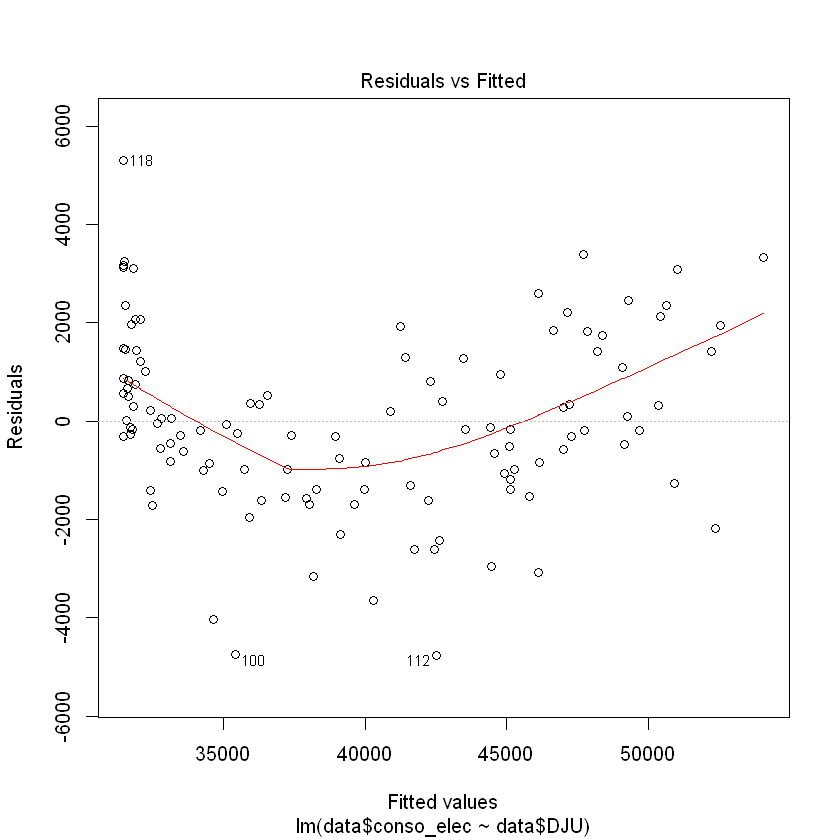

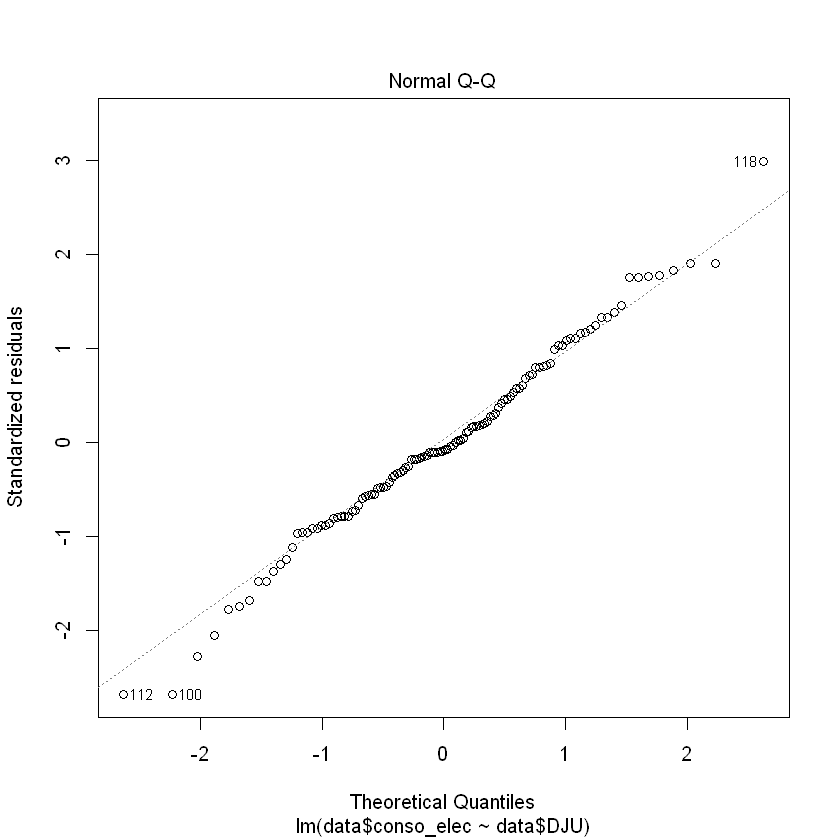

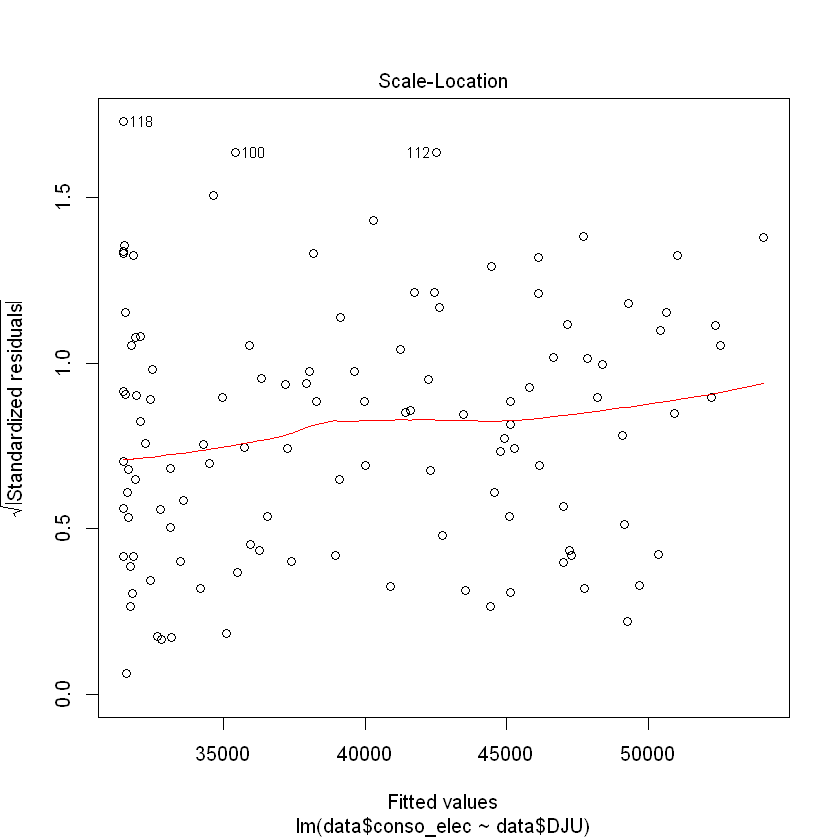

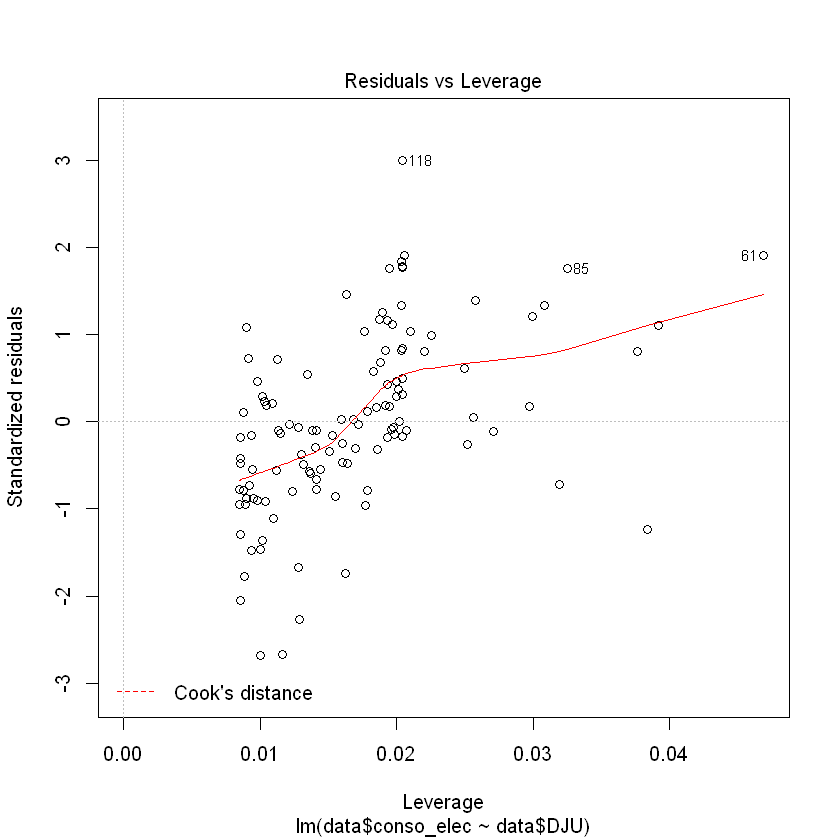

In [22]:
# Représentation graphique des résidus
plot(reg)

Residuals vs fitted: Les résidus suivent une ligne légèrement courbée le long de la valeur 0. A l'exception de quelques valeurs (100, 112, 118), les résidus forment une bande le long de la ligne et suggèrent que nos deux variables ont une relation linéaire.

Normal QQ: Les résidus semblent suivre une loi normale, à l'exception des mêmes valeurs extrêmes identifiées précédemment.

Residual vs Leverage: Influence des résidus mesurée par la distance de Cook

Standardized residuals: écart standardisé entre la valeur prédite et la valeur observée. Nous voyons que les points 61, 85 et 118 ont une forte influence sur le modèle.

In [23]:
# calcul de la consommation d'électricité corrigée
data$conso_correc <- data$conso_elec - (reg$coefficients[2] * data$DJU)
head(data)

Mois,conso_elec,DJU,conso_correc
2012-01-01,51086,336.0,34852.63
2012-02-01,54476,435.9,33416.10
2012-03-01,43156,201.9,33401.48
2012-04-01,40176,230.3,29049.38
2012-05-01,35257,83.3,31232.48
2012-06-01,33219,35.0,31528.02


In [24]:
# Suppression de la variable DJU
data$DJU <- NULL

In [25]:
# Création de la série temporelle
ts_data <- ts(data[, 2:3], start = c(2012, 1), frequency = 12)

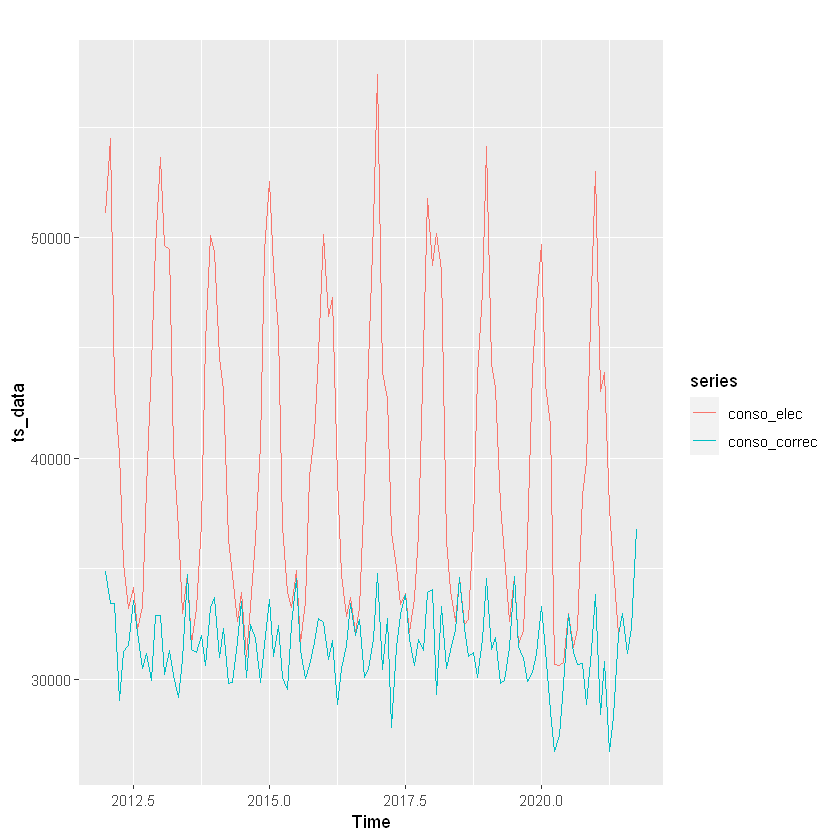

In [26]:
# Représentation de la consommation totale et de la consommation corrigée
autoplot(ts_data, facets=FALSE)

Nous observons que la consommation corrigée ne suit pas la même saisonnalité que la courbe de la consommation électrique. La consommation corrigée met en évidence les écarts aux valeurs saisonnières habituelles. Le début de l'année 2020 montre par exemple une consommation corrigée particulièrement faible, qui s'explique notamment par le 1er confinement de la pandémie du Covid-19 qui a entraîné une baisse significative de l'activité économique. En revanche, la fin 2020 montre une surconsommation particulièrement inhabituelle. 

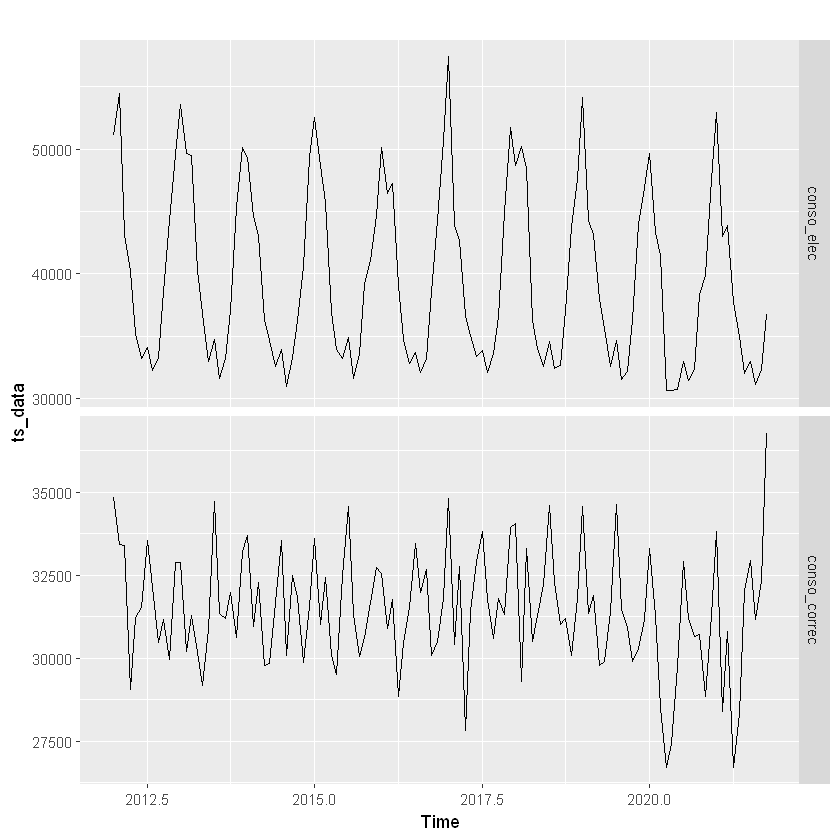

In [27]:
# Superposition graphique avec des échelles différentes
autoplot(ts_data, facets=TRUE)

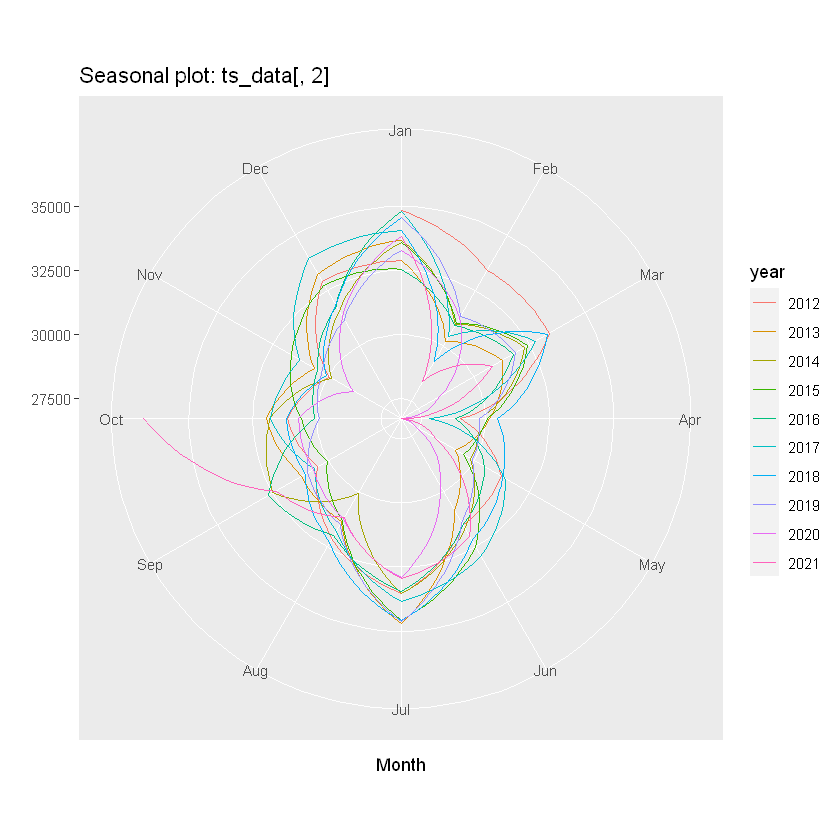

In [28]:
# Graphique saisonnier de la consommation corrigée
ggseasonplot(ts_data[,2], polar=TRUE)

Le graphique confirme que la consommation corrigée maintient un caractère saisonnier car ses pics (notamment en Juillet, Janviet et Mars) sont réguliers.

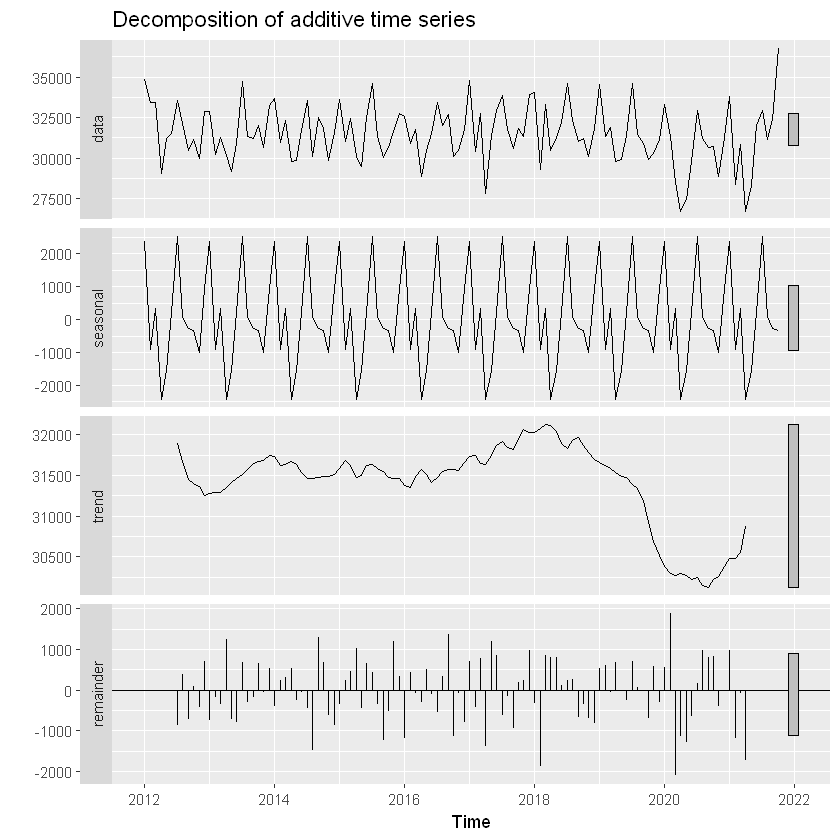

In [30]:
# Décomposition de la consommation corrigée en composantes de saison, de résidus et de tendance (par les moyennes mobiles)
decomp_correc=decompose(ts_data[,2],type="additive")
autoplot(decomp_correc, facets=TRUE)

La courbe de tendance ("trend") confirme la relative stabilité de la consommation électrique observée jusqu'en 2019, suivie d'une nette baisse en 2020 que nous avons précédemment attribuée à la baisse de l'activité occasionnée par la pandémie du Covid-19.

La courbe saisonnière quant à elle montre qu'un cycle saisonnier s'est maintenu malgré la correction prenant en compte les degrés de jour unifié.

Nous observons cependant que cette saisonnalité n'est pas annuelle mais plutôt semestrielle. Nous constatons en effet des valeurs extrêmes plus fréquemment que sur la courbe de la consommation électrique totale. Les valeurs hautes s'observent plutôt en hiver et en été, tandis que les valeurs basses se manifestent plutôt au printemps. Il semblerait qu'à température égale, la baisse de la consommation électrique soit plus significative au printemps qu'en automne.

In [31]:
# Coefficients de variation de chaque variable
coef_var <- sapply(data[,2:3], function(x) sd(x) / mean(x) * 100)
coef_var


# coefficient de variation corrigé par rapport à la consommation électrique totale
coef_var[2]/coef_var[1]*100

conso_elec conso_correc 
   17.857170     5.650208

conso_correc 
    31.64112

Le coefficient de variation de la consommation électrique est bien supérieur au coefficient de variation de la consommation électrique corrigée. La consommation corrigée a en effet un coefficient de variation égale à 31.6% de la consommation totale. On peut en déduire que la consommation corrigée est moins déterminée par la saisonnalité que la série de la consommation électrique et contribuera mieux à un modèle de prédiction.

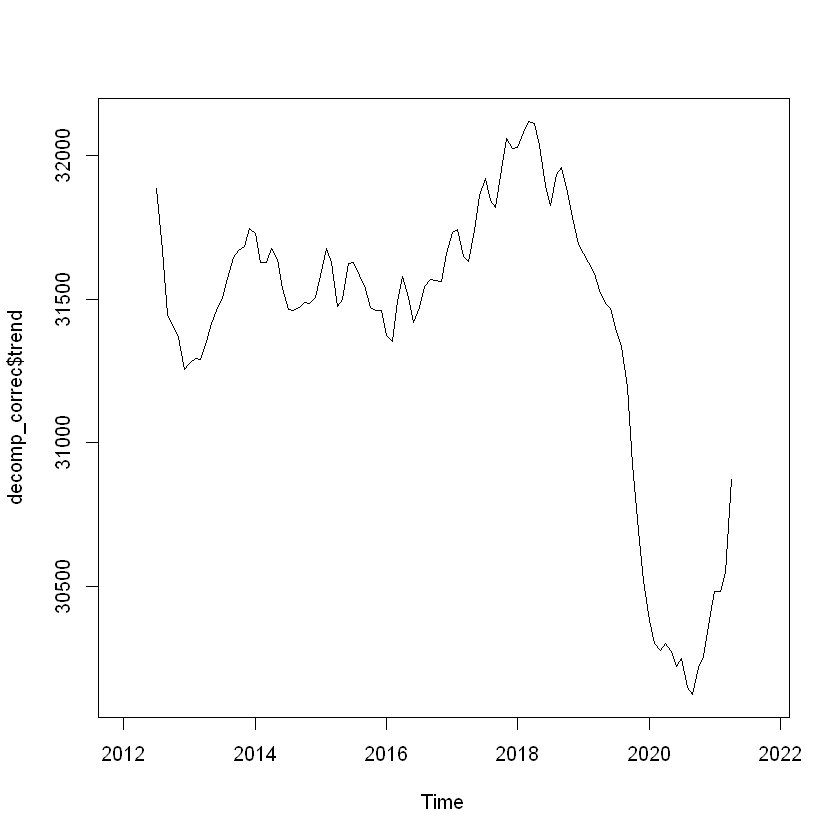

In [32]:
# Tendance de la consommation corrigée, calculée par moyennes mobiles
plot(decomp_correc$trend, type = "l")

In [33]:
# Taux de variation maximal sur la période 2012-2018
var_1 = window(decomp_correc$trend, start=c(2012,1), end=c(2018,1))
max((na.omit(var_1)) - min(na.omit(var_1))) / min(na.omit(var_1))*100

[1] 2.574417

Entre 2012 et 2018, la consommation électrique corrigée et désaisonnalisée a connu une variation maximale de 2.57% de sa valeur

In [34]:
# Taux de variation maximal sur la période 2018-2021
var_2 = window(decomp_correc$trend, start=c(2018,1), end=c(2021,2))
max((na.omit(var_2)) - min(na.omit(var_2))) / min(na.omit(var_2))*100

[1] 6.628069

Entre 2018 et 2021, soit une période deux fois plus courte que la précédente, la consommation électrique corrigée et désaisonnalisée a connu une variation maximale de 6.63% de sa valeur. Nous constatons donc un écart majeur entre ces deux périodes.

Warning message in modeldf.default(object):
"Could not find appropriate degrees of freedom for this model."

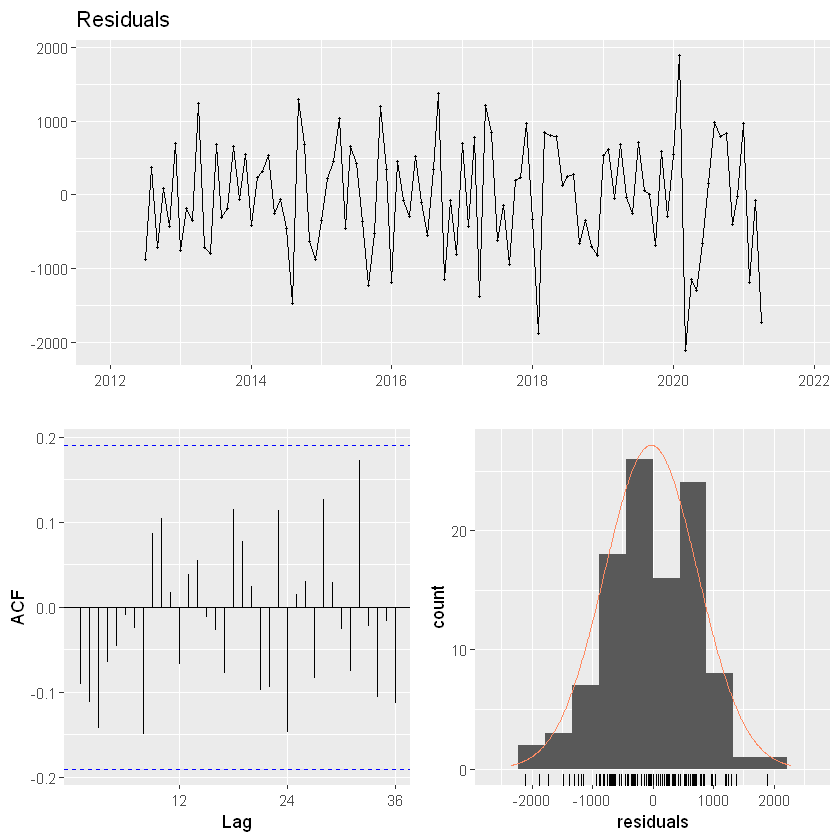

In [35]:
# Analyse des résidus
checkresiduals(remainder(decomp_correc))

La courbe des résidus confirme le caractère exceptionnel des valeurs observées au début de l'année 2020.
Enfin, il est probable que les résidus suivent une loi normale, ce qui valide notre régression.

In [36]:
# Test de Ljung Box sur les résidus
Box.test(decomp_correc$random,lag=1, type = "Ljung-Box")


	Box-Ljung test

data:  decomp_correc$random
X-squared = 0.88906, df = 1, p-value = 0.3457


L'hypothèse nulle HO stipule qu'il n'y a pas d'auto-corrélation des résidus. Le test de significativité des paramètres des résidus (p-value) sont validés au niveau 5%. On ne peut donc pas en déduire que les résidus sont indépendants entre eux.


source: <https://stats.stackexchange.com/questions/64711/ljung-box-statistics-for-arima-residuals-in-r-confusing-test-results>

In [37]:
# Test de normalité Shapiro-Wilk
shapiro.test(decomp_correc$random)


	Shapiro-Wilk normality test

data:  decomp_correc$random
W = 0.99068, p-value = 0.6827


L'hypothèse H0 est ici que nos résidus suivent une loi normale. Avec une p-valeur supérieure à 0,05, H0 n'est donc pas rejetée et on peut en conclure que les résidus suivent une loi normale.
La normalité des résidus et leur absence d'auto-corrélation suggère que le lissage exponentielle de Holt-Winters est un bon moyen de modéliser la prédiction de notre série temporelle.

### Méthode Holt-Winters

In [38]:
# Ajustement automatique avec la fonction HoltWinters
HW1 <- HoltWinters(ts_data[,2], seasonal = "additive")
HW1

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = ts_data[, 2], seasonal = "additive")

Smoothing parameters:
 alpha: 0.1735066
 beta : 0.008432095
 gamma: 0.2972495

Coefficients:
            [,1]
a   31749.526416
b      -8.412883
s1  -1032.271010
s2    931.980824
s3   2747.337723
s4   -919.474914
s5    157.431692
s6  -2577.586157
s7  -1533.067753
s8    707.403236
s9   2772.726322
s10   598.735554
s11   393.733833
s12  1280.285294

Dans la modélisation automatique de Holt Winters:
alpha (valeur) = 0.173
beta (tendance) = 0.008
gamma (saisonnalité) = 0.297

La valeur alpha (0.17) indique que notre modèle détermine son niveau grâce à une part très marginale des observations récentes. 
La tendance exprimée par la valeur beta (0.008) est proche de 0. On peut en déduire que la tendance a été très peu modifiée par les observations récentes.
La valeur gamma est la plus élevée des valeurs relevées par notre modèle (0.297) signifie que sa saisonnalité est partiellement déterminée par les observations récentes.

In [39]:
summary(HW1)

             Length Class  Mode     
fitted       424    mts    numeric  
x            118    ts     numeric  
alpha          1    -none- numeric  
beta           1    -none- numeric  
gamma          1    -none- numeric  
coefficients  14    -none- numeric  
seasonal       1    -none- character
SSE            1    -none- numeric  
call           3    -none- call     

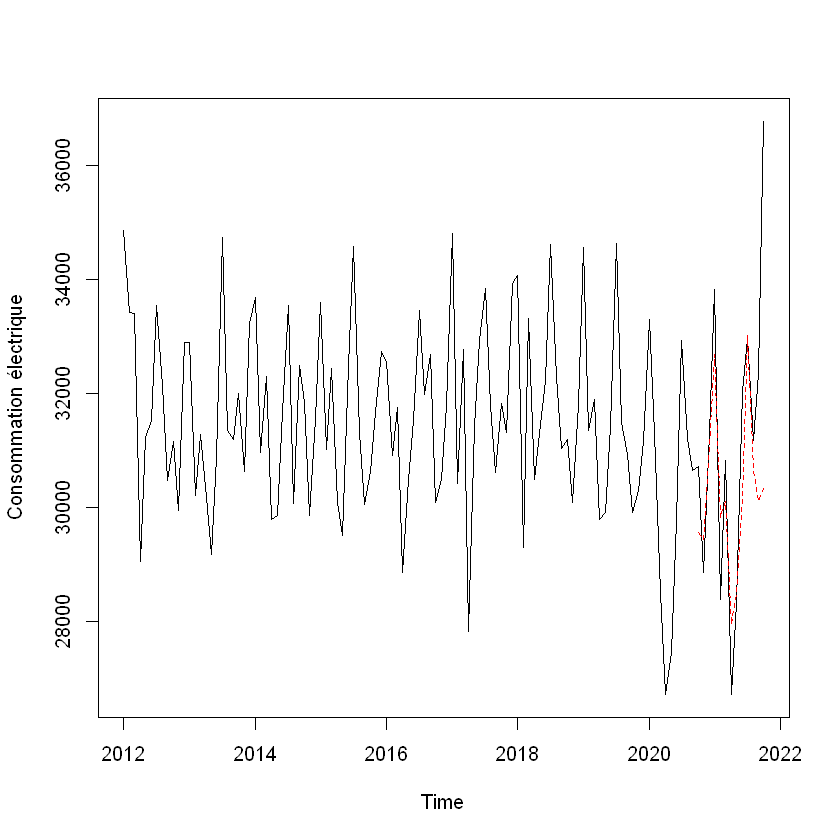

In [40]:
# Consommation électrique et prédiction sur un an entre 2020 et 2021 par la méthode Holt-Winters
plot(ts_data[,2], ylab="Consommation électrique")
lines(window(HW1$fitted[,1], start=c(2020,10), end=c(2021,10)), lty=2, col="red")

Il semblerait que la méthode Holt-Winters parvient à prédire assez bien la tendance. Les pics reproduits (en rouge) correspondent dans une certaine mesure à la réalité observée, sauf pour le dernier mois mesuré en 2021 dont la croissance paraît particulièrement élevée.  

In [41]:
pred_HW1_mean = pred_HW1$mean
pred_HW1_low = pred_HW1$lower
pred_HW1_up = pred_HW1$upper

ts.plot(ts_data[,2], pred_HW1_mean, pred_HW1_low, pred_HW1_up, xlab="Année", ylab="Consommation corrigée", col=c(1,2,3,3), lty=c(1,1,2,2), lwd=c(3,3,2,2))
legend("topleft", legend=c("Consommation corrigée", "Prédiction"), col=c(1,2,3,3), lty=c(1,1), lwd=c(3,3))
legend("topright", legend=c("int_inf_95%", "int_sup_95%"), col=c(3,3), lty = c(2,2), lwd = c(2,2))

ERROR: Error in eval(expr, envir, enclos): objet 'pred_HW1' introuvable


### Méthode SARIMA

Une série temporelle est dite "stationnaire" si cette série n'a pas de tendance, qu'elle démontre une variance et une autocorrélation qui sont constantes dans le temps.

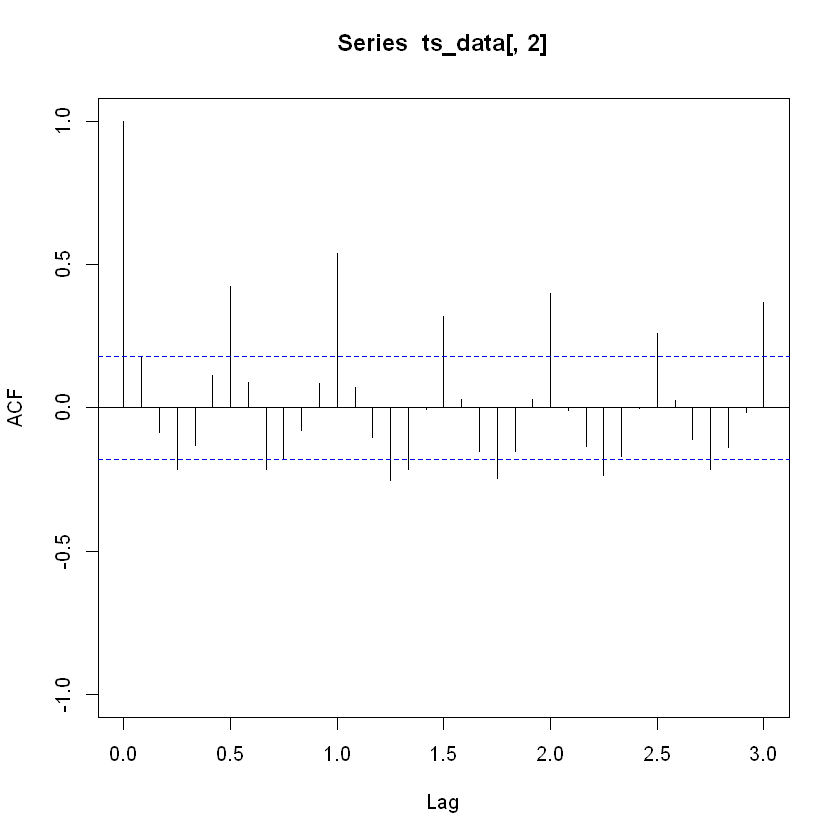

In [42]:
# Autocorrélogramme simple de la consommation corrigée
plot(acf(ts_data[,2],lag.max = 36, plot=FALSE), ylim=c(-1,1))

L'autocorrélogramme présente une décroissance rapide vers 0, mais avec des pics dépassant notre seuil tous les 5. Le processus ne semble donc pas stationnaire. Nous allons tenter de confirmer cette observation par le test de Dickey-Fuller augmenté.

In [43]:
# Test de Dickey-Fuller augmenté sur un lag de 12
adf.test(ts_data[,2], alternative = "stationary", k = 12 )


	Augmented Dickey-Fuller Test

data:  ts_data[, 2]
Dickey-Fuller = -1.6466, Lag order = 12, p-value = 0.7233
alternative hypothesis: stationary


Dans notre test, l'hypothèse nulle est que notre série temporelle est non-stationnaire. Nous constatons que la p-valeur est largement supérieure au seuil de 0.05. Nous ne pouvons pas rejeter l'hypothèse nulle. La série temporelle n'est donc pas stationnaire. 

In [44]:
# Estimation du nombre de différence requise pour rendre notre processus stationnaire
ndiffs(ts_data[,2], alpha = 0.05)
nsdiffs(ts_data[,2], alpha = 0.05)

[1] 0

[1] 1

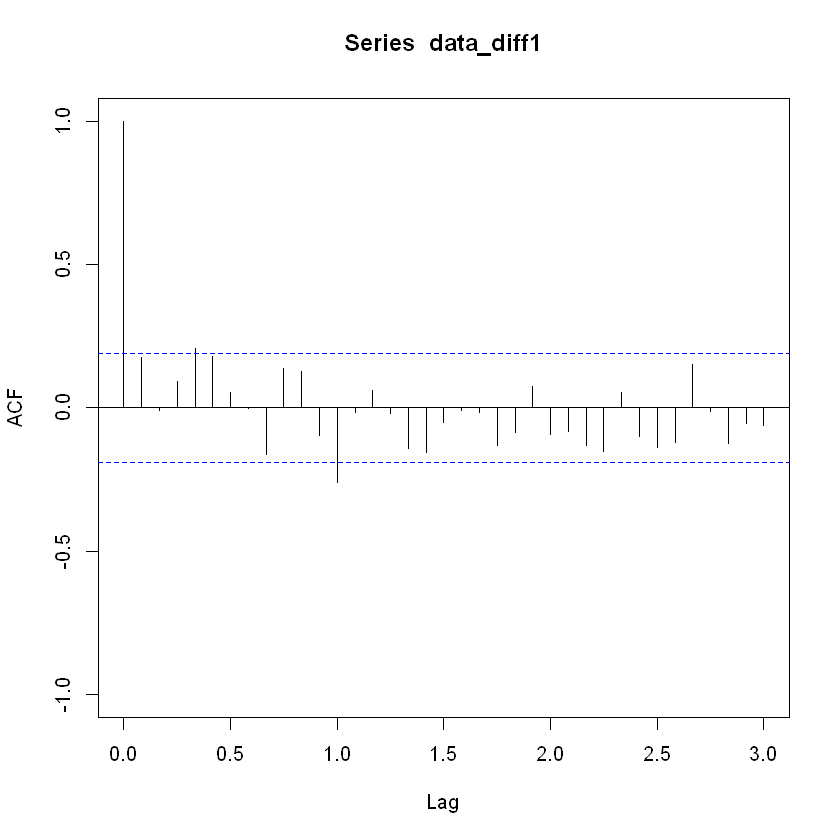

In [45]:
# Autocorrélogramme testé avec une différenciation de 1
data_diff1 = diff(ts_data[,2], lag=12, differences = 1)
plot(acf(data_diff1, lag.max = 36, plot = FALSE), ylim=c(-1,1))

Au regard, de l'autocorrélogramme, la série temporelle de première différence semble être stationnaire.

In [47]:
# Test de Dickey-Fuller augmenté sur le processus différencié une fois
adf.test(data_diff1, alternative = "stationary", k = 12)


	Augmented Dickey-Fuller Test

data:  data_diff1
Dickey-Fuller = -1.2174, Lag order = 12, p-value = 0.9005
alternative hypothesis: stationary


Le test de Dickey-Fuller confirme la stationnarité de notre série temporelle avec une différence de 1.

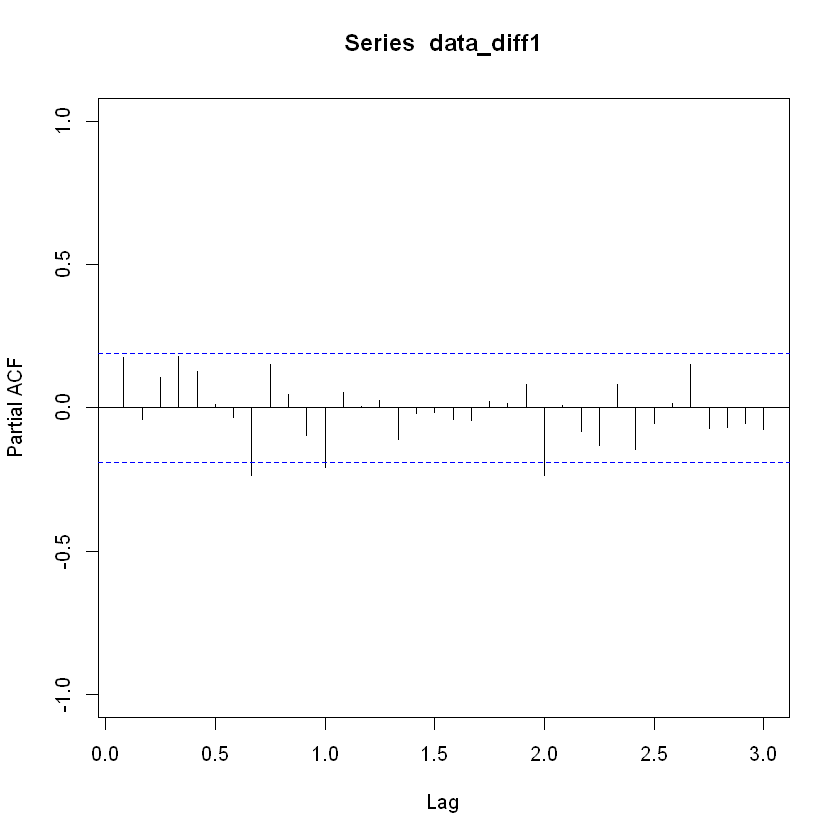

In [48]:
# Autocorrélogramme partiel testé avec une différenciation de 1
plot(pacf(data_diff1, lag.max = 36, plot = FALSE), ylim=c(-1,1))

L'autocorrélogramme partiel confirme qu'avec une différence de 1 (d=1), le processus est maintenant stationnaire.

In [50]:
# Test avec un modèle (0,0,2) (0,1,1) déduit de l'analyse des pics du corrélogramme
model1 = arima(ts_data[,2], order = c(0,0,2), list(order=c(0,1,1), period=12),include.mean = FALSE, method = "CSS-ML")
summary(model1)


Call:
arima(x = ts_data[, 2], order = c(0, 0, 2), seasonal = list(order = c(0, 1, 
    1), period = 12), include.mean = FALSE, method = "CSS-ML")

Coefficients:
         ma1     ma2     sma1
      0.3142  0.1242  -0.8551
s.e.  0.1079  0.1029   0.1891

sigma^2 estimated as 1355533:  log likelihood = -906.41,  aic = 1820.81

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE
Training set -130.609 1103.534 783.8653 -0.5331479 2.522088 0.4236355
                    ACF1
Training set -0.00603515


Au regard du MAPE, notre modèle nous donne un pourcentage d'erreur de 2,52%.
Le MAE indique un erreur moyenne absolue de 783

In [51]:
model2 = arima(ts_data[,2], order = c(1,1,1), list(order=c(1,1,1), period=12),include.mean = FALSE, method = "CSS-ML")
summary(model1)


Call:
arima(x = ts_data[, 2], order = c(1, 1, 1), seasonal = list(order = c(1, 1, 
    1), period = 12), include.mean = FALSE, method = "CSS-ML")

Coefficients:
         ar1      ma1    sar1     sma1
      0.0733  -0.7419  0.0988  -0.9071
s.e.  0.1611   0.1283  0.1486   0.2837

sigma^2 estimated as 1345188:  log likelihood = -898.63,  aic = 1807.25

Training set error measures:
                   ME     RMSE     MAE       MPE     MAPE      MASE
Training set 145.3171 1094.129 763.032 0.3614672 2.429961 0.4123763
                     ACF1
Training set -0.009863609


Au regard du MAPE, notre modèle nous donne un pourcentage d'erreur de 2,42%.
Le MAE indique un erreur moyenne absolue de 763

In [55]:
model3 = arima(ts_data[,2], order = c(1,1,1), list(order=c(0,1,1), period=12),include.mean = FALSE, method = "CSS-ML")
summary(model3)


Call:
arima(x = ts_data[, 2], order = c(1, 1, 1), seasonal = list(order = c(0, 1, 
    1), period = 12), include.mean = FALSE, method = "CSS-ML")

Coefficients:
         ar1      ma1     sma1
      0.0704  -0.7369  -0.8360
s.e.  0.1652   0.1342   0.1727

sigma^2 estimated as 1386918:  log likelihood = -898.85,  aic = 1805.7

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 143.1625 1110.968 771.6409 0.3518058 2.458898 0.4170289
                    ACF1
Training set -0.01007582


In [57]:
model4 = arima(ts_data[,2], order = c(0,1,1), list(order=c(0,1,1), period=12),include.mean = FALSE, method = "CSS-ML")
summary(model4)


Call:
arima(x = ts_data[, 2], order = c(0, 1, 1), seasonal = list(order = c(0, 1, 
    1), period = 12), include.mean = FALSE, method = "CSS-ML")

Coefficients:
          ma1     sma1
      -0.6943  -0.8309
s.e.   0.1010   0.1705

sigma^2 estimated as 1393836:  log likelihood = -898.94,  aic = 1803.88

Training set error measures:
                ME     RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 145.1 1113.736 772.1324 0.3578019 2.460469 0.4172945 0.01177019


MAPE=2.46 signifie qu'on se trompe avec 2.46 d'erreur
MAE=772 erreur moyenne absolue (avec unités de notre variable)

## Bibliographie:

Introduction aux séries temporelles: 
<http://eric.univ-lyon2.fr/~jjacques/Download/Cours/ST-Cours.pdf>

Les séries temporelles: 
<https://essicolo.github.io/ecologie-mathematique-R/chapitre-temps.html>

Généralités sur les séries chronologiques: 
<https://www.i3s.unice.fr/~crescenz/publications/Florence/introduction-series-chronologiques_chapitre-1.pdf>

Séries chronologique avec R (S. Rubenthaler): 
<https://cel.archives-ouvertes.fr/hal-02429148/document>

Forecasting: Principles and Practice: 
<https://otexts.com/fpp2/>

Forecasting using R (Datacamp): 
<https://campus.datacamp.com/courses/forecasting-in-r/exploring-and-visualizing-time-series-in-r?ex=1>

Plotting ts objects: 
<https://cran.r-project.org/web/packages/ggfortify/vignettes/plot_ts.html>

Time Series Forecasting in R with Holt-Winters: 
<https://towardsdatascience.com/time-series-forecasting-in-r-with-holt-winters-16ef9ebdb6c0>

Test de Fickey-Fuller:
<https://www.statology.org/dickey-fuller-test-in-r/>

Time Series Analysis with R (github de Nicolas Righetti):
<https://nicolarighetti.github.io/Time-Series-Analysis-With-R/>

Time Series Analysis (R Cookbook 2nd Edition):
<https://rc2e.com/timeseriesanalysis>

Using R for Time Series Analysis:
<https://a-little-book-of-r-for-time-series.readthedocs.io/en/latest/src/timeseries.html#holt-winters-exponential-smoothing>